In [1]:
# This notebook analyzes input variables w.r.t. phase yields (oil, char, gas) using Pearson correlation (detection of linear relationships)

In [2]:
# Import data from CSV files
from csv import DictReader

with open('_data/fluidized_bed.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_fb = [r for r in reader]
csv_file.close()

with open('_data/batch_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_br = [r for r in reader]
csv_file.close()

with open('_data/tubular_reactor.csv', 'r') as csv_file:
    reader = DictReader(csv_file)
    rows_tr = [r for r in reader]
csv_file.close()

In [3]:
# Here we calculate the Pearson coefficient and p-value; the coefficient measures the linearity between two series of data (x and y), and the p-value is the probability that the null hypothesis (correlation between x and y occurred by chance) is true; a lower p-value means we reject the null hypothesis, indicating a sound correlation

from scipy.stats import pearsonr
from typing import Tuple, List


def calc_pearson(x: List[float], y: List[float]) -> Tuple[float, float]:
    """
    Given two series of data, filter out any unknown ('-') values, determine Pearson coefficient and p-value

    Args:
        x (List[float]): series 1
        y (List[float]): series 2

    Returns:
        Tuple[float, float]: (coefficient, p-value)
    """

    to_use_x = []
    to_use_y = []

    for i in range(len(x)):
        if x[i] != '-' and y[i] != '-':
            to_use_x.append(float(x[i]))
            to_use_y.append(float(y[i]))

    return pearsonr(to_use_x, to_use_y)

# Separate input variables from target variables
targets = ['Oil', 'Char', 'Gas']
inputs = list(rows_fb[0].keys())
inputs.remove(targets[0])
inputs.remove(targets[1])
inputs.remove(targets[2])

# Iterate over all input/target combinations for FLUIDIZED BED
results = {}
for inp in inputs:
    for tar in targets:
        results[f'{inp}, {tar}'] = calc_pearson([r[inp] for r in rows_fb], [r[tar] for r in rows_fb])

# Let's take a look at the relationships with relatively low (< 0.05%) p-value
for key in list(results.keys()):
    if results[key][1] < 0.0005:
        print(key, results[key])

Reaction temperature (C), Char (-0.7310386825614246, 7.572745152698355e-10)
Reaction temperature (C), Gas (0.8437685753978965, 4.051463737175003e-15)


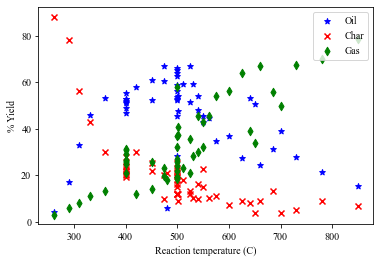

In [4]:
# Reaction temperature appears to have a strong linear relationship with char and gas yields, let's plot all yields w.r.t. reaction temperature

from matplotlib import pyplot as plt

reaction_temp, oil, char, gas = [], [], [], []

for i in range(len(rows_fb)):
    if rows_fb[i]['Reaction temperature (C)'] != '-' and rows_fb[i]['Oil'] != '-' and rows_fb[i]['Char'] != '-' and rows_fb[i]['Gas'] != '-':
        reaction_temp.append(float(rows_fb[i]['Reaction temperature (C)']))
        oil.append(float(rows_fb[i]['Oil']))
        char.append(float(rows_fb[i]['Char']))
        gas.append(float(rows_fb[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(reaction_temp, oil, color='blue', label='Oil', marker='*')
plt.scatter(reaction_temp, char, color='red', label='Char', marker='x')
plt.scatter(reaction_temp, gas, color='green', label='Gas', marker='d')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('% Yield')
plt.legend(loc='upper right')
plt.show()

In [5]:
# Now let's run the same procedure for TUBULAR REACTOR

# Iterate over all input/target combinations
results = {}
for inp in inputs:
    for tar in targets:
        results[f'{inp}, {tar}'] = calc_pearson([r[inp] for r in rows_tr], [r[tar] for r in rows_tr])

# Let's take a look at the relationships with relatively low (< 0.05%) p-value
for key in list(results.keys()):
    if results[key][1] < 0.0005:
        print(key, results[key])

Feed rate (g/min), Oil (-0.7681950676559598, 1.865219049794043e-05)
Feed rate (g/min), Char (0.7807036328390373, 1.1061298097372795e-05)
C, Oil (0.6703702263227421, 0.0002456971070755415)
N, Oil (-0.7718417258657473, 6.227311945655263e-06)
O, Gas (-0.6560973909444883, 0.00036914243028803197)
Reaction temperature (C), Gas (0.707414061744784, 7.665037621676346e-05)
Reaction time (s), Oil (-0.7340799101024964, 6.684336639346449e-05)
Reaction time (s), Gas (0.6811028070420309, 0.0003465559223778735)
Particle size (mm), Oil (-0.7485668735068519, 1.679061065190016e-05)


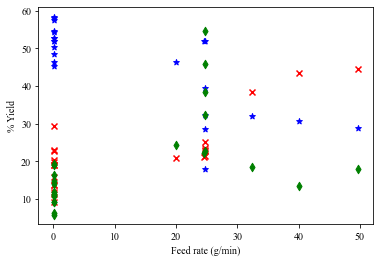

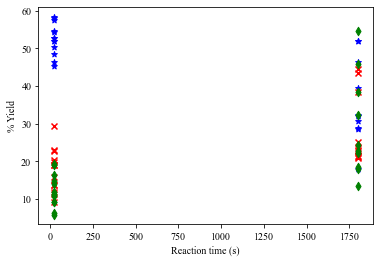

In [6]:
# It looks like feed rate and reaction time have linear correlations with yields, let's plot them:

feed_rate, oil, char, gas = [], [], [], []

for i in range(len(rows_tr)):
    if rows_tr[i]['Feed rate (g/min)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        feed_rate.append(float(rows_tr[i]['Feed rate (g/min)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(feed_rate, oil, color='blue', label='Oil', marker='*')
plt.scatter(feed_rate, char, color='red', label='Char', marker='x')
plt.scatter(feed_rate, gas, color='green', label='Gas', marker='d')
plt.xlabel('Feed rate (g/min)')
plt.ylabel('% Yield')
plt.show()

reaction_time, oil, char, gas = [], [], [], []

for i in range(len(rows_tr)):
    if rows_tr[i]['Reaction time (s)'] != '-' and rows_tr[i]['Oil'] != '-' and rows_tr[i]['Char'] != '-' and rows_tr[i]['Gas'] != '-':
        reaction_time.append(float(rows_tr[i]['Reaction time (s)']))
        oil.append(float(rows_tr[i]['Oil']))
        char.append(float(rows_tr[i]['Char']))
        gas.append(float(rows_tr[i]['Gas']))

plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(reaction_time, oil, color='blue', label='Oil', marker='*')
plt.scatter(reaction_time, char, color='red', label='Char', marker='x')
plt.scatter(reaction_time, gas, color='green', label='Gas', marker='d')
plt.xlabel('Reaction time (s)')
plt.ylabel('% Yield')
plt.show()

In [7]:
# Same procedure, BATCH REACTOR:

# Iterate over all input/target combinations
results = {}
for inp in inputs:
    for tar in targets:
        results[f'{inp}, {tar}'] = calc_pearson([r[inp] for r in rows_br], [r[tar] for r in rows_br])

# Let's take a look at the relationships with relatively low (< 0.05%) p-value
for key in list(results.keys()):
    if results[key][1] < 0.0005:
        print(key, results[key])

Feed rate (g/min), Char (0.8653622194240461, 3.5282494745415023e-06)
C, Oil (-0.5822059293903491, 2.72434880724897e-05)
Reaction temperature (C), Char (-0.8815906373380963, 1.302502862492764e-15)
Reaction temperature (C), Gas (0.8748172513186971, 4.014894810471198e-15)
Particle size (mm), Char (0.839534232934029, 6.696249836670731e-09)
Particle size (mm), Gas (-0.7462865928753009, 2.193430401713285e-06)


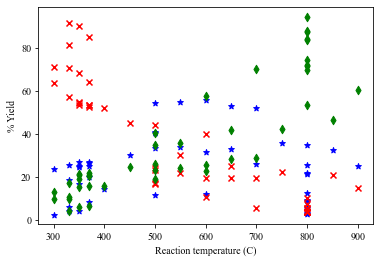

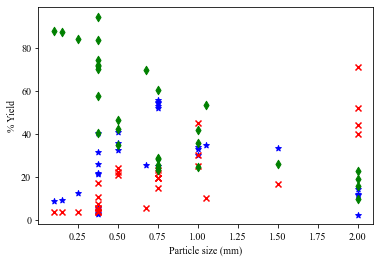

In [8]:
# Let's plot yields vs. reaction temperature and particle size:

reaction_temp, oil, char, gas = [], [], [], []

for i in range(len(rows_br)):
    if rows_br[i]['Reaction temperature (C)'] != '-' and rows_br[i]['Oil'] != '-' and rows_br[i]['Char'] != '-' and rows_br[i]['Gas'] != '-':
        reaction_temp.append(float(rows_br[i]['Reaction temperature (C)']))
        oil.append(float(rows_br[i]['Oil']))
        char.append(float(rows_br[i]['Char']))
        gas.append(float(rows_br[i]['Gas']))

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(reaction_temp, oil, color='blue', label='Oil', marker='*')
plt.scatter(reaction_temp, char, color='red', label='Char', marker='x')
plt.scatter(reaction_temp, gas, color='green', label='Gas', marker='d')
plt.xlabel('Reaction temperature (C)')
plt.ylabel('% Yield')
plt.show()

part_size, oil, char, gas = [], [], [], []

for i in range(len(rows_br)):
    if rows_br[i]['Particle size (mm)'] != '-' and rows_br[i]['Oil'] != '-' and rows_br[i]['Char'] != '-' and rows_br[i]['Gas'] != '-':
        part_size.append(float(rows_br[i]['Particle size (mm)']))
        oil.append(float(rows_br[i]['Oil']))
        char.append(float(rows_br[i]['Char']))
        gas.append(float(rows_br[i]['Gas']))

plt.rcParams['font.family'] = 'Times New Roman'
plt.scatter(part_size, oil, color='blue', label='Oil', marker='*')
plt.scatter(part_size, char, color='red', label='Char', marker='x')
plt.scatter(part_size, gas, color='green', label='Gas', marker='d')
plt.xlabel('Particle size (mm)')
plt.ylabel('% Yield')
plt.show()